In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib
import os

In [2]:
file_path = r"D:\Programming\Projects\Data\Diabetes\diabetes_binary_health_indicators_BRFSS2015.csv"

df = pd.read_csv(file_path)

In [3]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.select_dtypes('number').columns

features = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age']

X = df[features]

y = df["Diabetes_binary"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)

In [ ]:
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

xgboost_model = XGBClassifier(random_state=42, eval_metric="logloss")

params = {
    "max_depth": [3,5,7],
    "learning_rate": [0.01,0.05,0.1],
    "n_estimators": [100,200,300],
    "subsample": [0.7,0.8,1.0],
    "colsample_bytree": [0.7,0.8,1.0],
    "reg_alpha": [0, 0.1, 1],
    "reg_lambda": [1,2,3]
}

model = RandomizedSearchCV(estimator=xgboost_model, param_distributions=params, n_iter=50, scoring="accuracy", n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

best_model = model.best_estimator_
best_model.fit(X_train, y_train, verbose=False)

joblib.dump(best_model, "db_model.pkl")
joblib.dump(standard_scaler, "db_standard_scaler.pkl")

print("Model saved")


XGBOOST MODEL

In [7]:
main_model = joblib.load("db_model.pkl")
sss = joblib.load("db_standard_scaler.pkl")

In [8]:
X_test_new = sss.transform(X_test)

predictions = main_model.predict(X_test_new)

accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.865


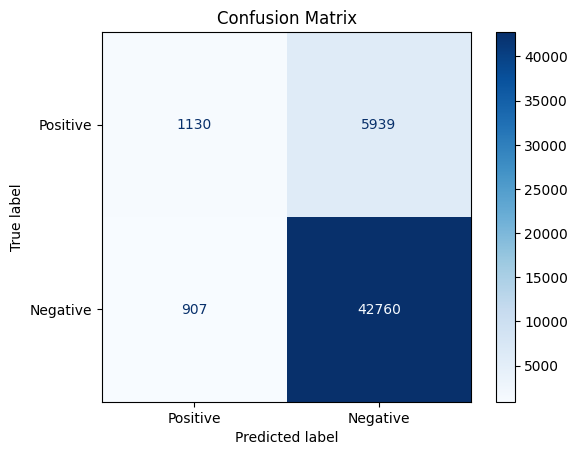

In [9]:
cm = confusion_matrix(y_test, predictions, labels=[1,0])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

FEATURE IMPORTANCE

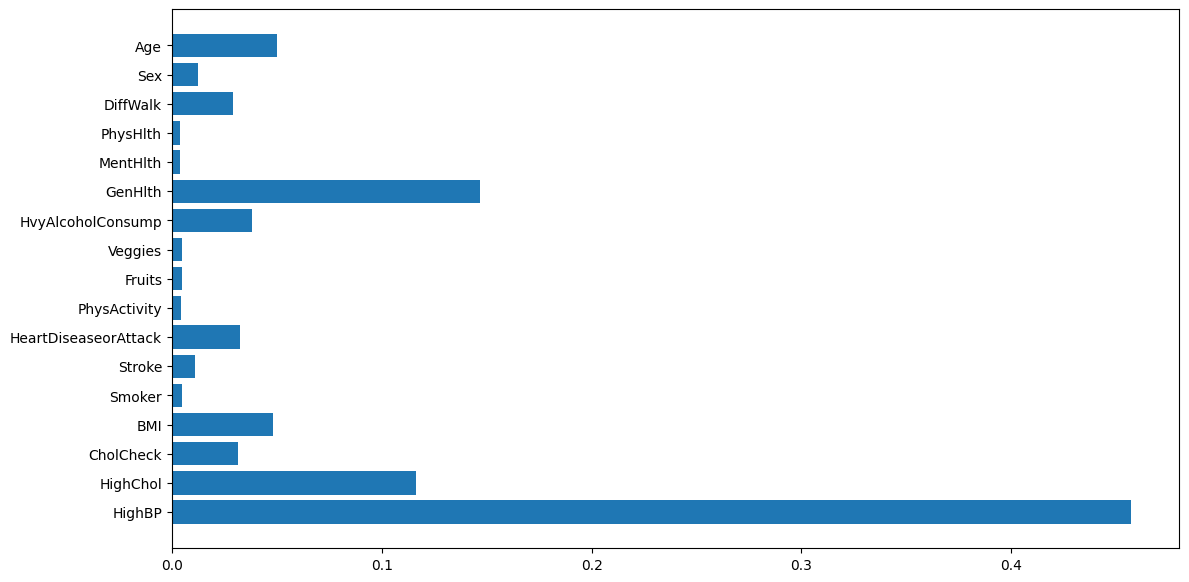

In [10]:
features = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age']
imp = main_model.feature_importances_
plt.figure(figsize=(13, 7))
plt.barh(features, imp)
plt.show()